In [1]:
import pandas as pd
import numpy as np
import pm4py
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from collections import Counter
import os
import seaborn as sns
import matplotlib.dates as mdates
from collections import defaultdict
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

In [2]:
#UPLOAD DATA FROM FILE

mixed_type_columns = [11, 13, 14, 15, 16, 17, 18, 19]

dtype_mapping = {col_idx: 'object' for col_idx in mixed_type_columns}

click_log_raw = pd.read_csv("C:\\Users\90545\Documents\Business information systems\Dataset\dataset_1\BPI2016_Clicks_Logged_In.csv~\BPI2016_Clicks_Logged_In.csv", sep=';', encoding='latin1', dtype=dtype_mapping)

click_log = click_log_raw [["CustomerID", "AgeCategory", "Gender", "Office_U", "Office_W", "SessionID", "IPID", "TIMESTAMP", "VHOST", "URL_FILE", "PAGE_NAME", "REF_URL_category", "page_load_error", "page_action_detail_EN", "service_detail_EN", "tip_EN", "xps_info"]]
click_log.head(10)

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info
0,2025826,50-65,V,313,313,12956475,620841,2015-10-05 10:12:56.880000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN
1,2025826,50-65,V,313,313,13243433,620841,2015-09-30 15:14:35.943000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN
2,1503890,30-39,V,247,247,14805466,1690840,2015-09-01 19:35:06.707000000,digid.werk.nl,/portal/page/portal/home/diensten/aanvragen-tw,aanvragen-tw,NaN,0,NaN,3. Send data,NaN,NaN
3,2063574,50-65,M,296,301,12710639,1632512,2015-11-06 10:47:42.137000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN
4,2185161,18-29,V,327,327,44281847,757955,2016-01-11 18:44:07.877000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/bijstan...,bijstandsuitkering,NaN,0,NaN,NaN,NaN,NaN
5,2074173,40-49,M,296,269,32607429,1855184,2015-11-09 22:43:19.973000000,www.werk.nl,/werk_nl/werknemer/solliciteren/europa/land/fr...,frankrijk,NaN,0,NaN,NaN,NaN,NaN
6,2140620,30-39,V,271,274,4752535,1723649,2015-11-02 11:39:37.567000000,digid.werk.nl,/werk_nl/werknemer/eintake/inschrijven,inschrijven,NaN,0,NaN,NaN,NaN,NaN
7,2099262,50-65,V,330,330,388094,967997,2015-10-28 17:00:52.393000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/inschri...,inschrijven,NaN,0,NaN,NaN,NaN,NaN
8,1626445,50-65,M,330,330,12239424,1268110,2015-08-27 21:03:34.143000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/inschri...,inschrijven,NaN,0,NaN,NaN,NaN,NaN
9,2096614,40-49,M,313,313,45886197,1916881,2016-01-19 10:44:52.140000000,digid.werk.nl,/portal/page/portal/home/diensten/aanvragen-tw,aanvragen-tw,NaN,0,NaN,NaN,NaN,NaN


In [3]:
# CHECK THAT THE COLUMNS CustomerID, AgeCategory, Gender, TIMESTAMP, VHOST, URL_FILE DO NOT HAVE MISSING VALUES

columns_to_check = ["CustomerID", "AgeCategory", "Gender", "TIMESTAMP", "VHOST", "URL_FILE"]

null_values = click_log[columns_to_check].isnull().sum()

for column, count in null_values.items():
    print(f"Column '{column}' has {count} missing values.")

Column 'CustomerID' has 0 missing values.
Column 'AgeCategory' has 0 missing values.
Column 'Gender' has 0 missing values.
Column 'TIMESTAMP' has 0 missing values.
Column 'VHOST' has 0 missing values.
Column 'URL_FILE' has 0 missing values.


In [4]:
# CONVERT THE TIMESTAMP AND SORT IT

click_log['TIMESTAMP'] = pd.to_datetime(click_log['TIMESTAMP'])
click_log.sort_values(by=['SessionID', 'TIMESTAMP'], ascending=[True, True], inplace=True)

C:\Users\90545\AppData\Local\Temp\ipykernel_3884\938480737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_log['TIMESTAMP'] = pd.to_datetime(click_log['TIMESTAMP'])
C:\Users\90545\AppData\Local\Temp\ipykernel_3884\938480737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_log.sort_values(by=['SessionID', 'TIMESTAMP'], ascending=[True, True], inplace=True)


In [5]:
# CREATE ACTIVITY COLUMN

selected_columns = ['VHOST', 'PAGE_NAME', 'REF_URL_category', 'page_action_detail_EN', 'service_detail_EN']
click_log['Activity'] = click_log[selected_columns].apply(tuple, axis=1).copy()
click_log

C:\Users\90545\AppData\Local\Temp\ipykernel_3884\2731102139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_log['Activity'] = click_log[selected_columns].apply(tuple, axis=1).copy()


,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info,Activity
3273278,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:22.780,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)"
5333642,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:40.767,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...,mijn_sollicitaties,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_sollicitaties, nan, nan, ..."
3733243,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:51.390,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)"
5904405,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:06.003,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
5573282,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:19.343,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613546,2209110,18-29,V,230,230,55314751,505057,2016-02-28 08:17:15.947,www.werk.nl,/werk_nl/werknemer/werkmap,werkmap,UWV,0,NaN,NaN,NaN,NaN,"(www.werk.nl, werkmap, UWV, nan, nan)"
2925569,2209110,18-29,V,230,230,55314751,505057,2016-02-28 08:18:10.877,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)"
4068602,2209110,18-29,V,230,230,55314751,505057,2016-02-28 08:18:41.493,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)"
5013440,2209110,18-29,V,230,230,55314751,505057,2016-02-28 08:19:59.737,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)"


In [6]:
# FILTER PAGE LOAD ERRORS WITH > 80 % OF OCCURRENCE

error_click_log = click_log[(click_log['page_load_error'] == 1)]

error_stat = error_click_log['Activity'].value_counts().reset_index()
error_stat.columns = ['Activity', 'Count_of_errors']

pages_stat = click_log['Activity'].value_counts().reset_index()
pages_stat.columns = ['Activity', 'Count']
page_error_stat = pd.merge(error_stat, pages_stat, how="left", on="Activity")

page_error_stat['Percentage'] = ((page_error_stat['Count_of_errors'] / page_error_stat['Count']) * 100).round(2)

page_error_percentage = page_error_stat[page_error_stat['Percentage'] > 80]

page_error_percentage = page_error_percentage.rename(columns={"Activity": "Activity", "Percentage": "Error Percentage"})

error_percentage = page_error_percentage[["Activity", "Error Percentage"]]
error_percentage = error_percentage.sort_values(by ='Error Percentage', ascending = False)

error_percentage.head(10)

,Activity,Error Percentage
253,"(digid.werk.nl, vacatures_bij_mijn_cv, UWV, na...",100.0
111,"(www.werk.nl, foutopgetreden.html, FAQ, nan, nan)",100.0
101,"(www.werk.nl, portal, nan, Show reports, nan)",100.0
192,"(www.werk.nl, TOPLEVELSITE, nan, nan, nan)",100.0
103,"(www.werk.nl, portal, nan, Reporting Add appli...",100.0
104,"(www.werk.nl, onderhoud.htm, Search Engine, na...",100.0
106,"(www.werk.nl, portal, nan, Reporting Add appli...",100.0
191,"(www.werk.nl, proeftijd, Search Engine, nan, nan)",100.0
109,"(www.werk.nl, foutopgetreden.html, Logged Out,...",100.0
113,"(www.werk.nl, wdo212471, nan, nan, nan)",100.0


<module 'matplotlib.pyplot' from 'C:\\Users\\90545\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

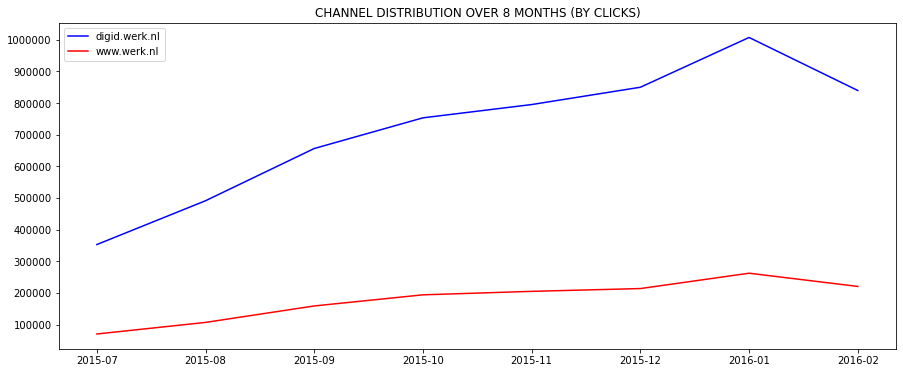

In [7]:
# CHANNEL DISTRIBUTION OVER 8 MONTHS (BY CLICKS)

digid_werk_nl_click = click_log[click_log["VHOST"] == "digid.werk.nl"][["VHOST", "TIMESTAMP"]]

#digid_werk_nl_click['TIMESTAMP'] = pd.to_datetime(digid_werk_nl_click['TIMESTAMP'])

digid_werk_nl_click['YearMonth'] = digid_werk_nl_click['TIMESTAMP'].dt.strftime('%Y-%m')

digid_werk_nl_monthly_counts_click = digid_werk_nl_click.groupby('YearMonth').size().reset_index(name='Count')

www_werk_nl_click = click_log[click_log["VHOST"] == "www.werk.nl"][["VHOST", "TIMESTAMP"]]

#www_werk_nl_click["TIMESTAMP"] = pd.to_datetime(www_werk_nl_click["TIMESTAMP"])

www_werk_nl_click['YearMonth'] = www_werk_nl_click["TIMESTAMP"].dt.strftime('%Y-%m')

www_werk_nl_monthly_counts_click = www_werk_nl_click.groupby('YearMonth').size().reset_index(name='Count')

digid_werk_nl_monthly_counts_click = digid_werk_nl_monthly_counts_click.sort_values('YearMonth')
www_werk_nl_monthly_counts_click = www_werk_nl_monthly_counts_click.sort_values('YearMonth')

plt.figure(figsize=(15, 6))

plt.plot(digid_werk_nl_monthly_counts_click['YearMonth'], digid_werk_nl_monthly_counts_click['Count'], linestyle='-', color='b', label='digid.werk.nl')

plt.plot(www_werk_nl_monthly_counts_click['YearMonth'], www_werk_nl_monthly_counts_click['Count'], linestyle='-', color='r', label='www.werk.nl')

plt.legend()

plt.yticks(digid_werk_nl_monthly_counts_click['Count'], ha='right')

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=100000))

plt.ticklabel_format(axis='y', style='plain', useOffset=False)

plt.title('CHANNEL DISTRIBUTION OVER 8 MONTHS (BY CLICKS)')

plt

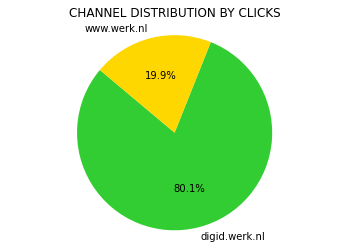

In [8]:
# CHANNEL DISTRIBUTION BY CLICKS

value_counts_clicks = click_log["VHOST"].value_counts()

mycolors = ["#32CD32", "#FFD700"]
plt.pie(value_counts_clicks, labels=value_counts_clicks.index, autopct='%1.1f%%', startangle=140, colors = mycolors)
plt.axis('equal')  
plt.title('CHANNEL DISTRIBUTION BY CLICKS')
plt.show()

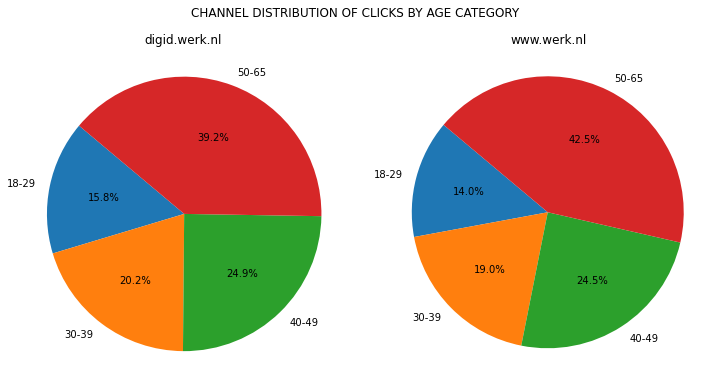

In [9]:
# CHANNEL DISTRIBUTION OF CLICKS BY AGE CATEGORY

grouped_AgeCategory_click = click_log.groupby(["VHOST", "AgeCategory"])["AgeCategory"].count()

reshaped_AgeCategory_click = grouped_AgeCategory_click.unstack(level=1)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(reshaped_AgeCategory_click.loc["digid.werk.nl"], labels=reshaped_AgeCategory_click.columns, autopct='%1.1f%%', startangle=140)
axs[0].set_title("digid.werk.nl")

axs[1].pie(reshaped_AgeCategory_click.loc["www.werk.nl"], labels=reshaped_AgeCategory_click.columns, autopct='%1.1f%%', startangle=140)
axs[1].set_title("www.werk.nl")

axs[0].axis('equal')
axs[1].axis('equal')

fig.suptitle('CHANNEL DISTRIBUTION OF CLICKS BY AGE CATEGORY')

plt.show()

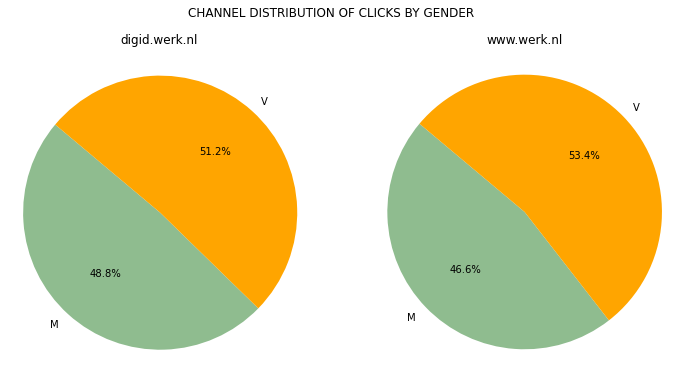

In [10]:
# CHANNEL DISTRIBUTION OF CLICKS BY GENDER

grouped_Gender_click = click_log.groupby(["VHOST", "Gender"])["Gender"].count()

reshaped_Gender_click = grouped_Gender_click.unstack(level=1)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

mycolors_gender = ["#8FBC8F", "#FFA500"]

axs[0].pie(reshaped_Gender_click.loc["digid.werk.nl"], labels=reshaped_Gender_click.columns, autopct='%1.1f%%', startangle=140, colors = mycolors_gender)
axs[0].set_title("digid.werk.nl")

axs[1].pie(reshaped_Gender_click.loc["www.werk.nl"], labels=reshaped_Gender_click.columns, autopct='%1.1f%%', startangle=140, colors = mycolors_gender)
axs[1].set_title("www.werk.nl")

axs[0].axis('equal')
axs[1].axis('equal')

fig.suptitle('CHANNEL DISTRIBUTION OF CLICKS BY GENDER')

plt.show()

In [11]:
#STATISTICS ABOUT FREQUENCY OF ACTIVITIES ON THE PAGES (WITH CLICKS)

activity_counts = click_log['Activity'].value_counts().reset_index()
activity_counts.columns = ['Activity', 'Count']
activity_counts

,Activity,Count
0,"(digid.werk.nl, taken, nan, nan, nan)",1748178
1,"(digid.werk.nl, vacatures_bij_mijn_cv, nan, na...",912039
2,"(digid.werk.nl, mijn_cv, nan, nan, nan)",832075
3,"(digid.werk.nl, vacatures_zoeken, nan, nan, nan)",560181
4,"(digid.werk.nl, mijn_berichten, nan, nan, nan)",501864
...,...,...
1004,"(www.werk.nl, wdo214194, nan, nan, nan)",1
1005,"(www.werk.nl, onderhoud.htm, Job Search Websit...",1
1006,"(www.werk.nl, arbeidstijden, Search Engine, na...",1
1007,"(www.werk.nl, griekenland, nan, nan, nan)",1


In [12]:
#STATISTICS ABOUT FREQUENCY PERCENTAGE OF ACTIVITIES (WITH CLICKS)

activity_counts['Percentage'] = ((activity_counts['Count'] / activity_counts['Count'].sum()) * 100).round(2)
activity_counts.head(10)

,Activity,Count,Percentage
0,"(digid.werk.nl, taken, nan, nan, nan)",1748178,24.37
1,"(digid.werk.nl, vacatures_bij_mijn_cv, nan, na...",912039,12.71
2,"(digid.werk.nl, mijn_cv, nan, nan, nan)",832075,11.60
3,"(digid.werk.nl, vacatures_zoeken, nan, nan, nan)",560181,7.81
4,"(digid.werk.nl, mijn_berichten, nan, nan, nan)",501864,6.99
5,"(www.werk.nl, home, Logged Out, nan, nan)",324122,4.52
6,"(www.werk.nl, home, nan, nan, nan)",237820,3.31
7,"(digid.werk.nl, mijn_sollicitaties, nan, nan, ...",194198,2.71
8,"(digid.werk.nl, mijn_werkmap, nan, nan, nan)",180859,2.52
9,"(digid.werk.nl, inschrijven, nan, nan, nan)",143155,2.00


In [13]:
# GET THE STATISTICS

clicks_stat = click_log.groupby('CustomerID').agg({
    'SessionID': 'nunique',        # Number of sessions
    'VHOST': 'nunique',           # Number of unique VHOST
    'PAGE_NAME': 'nunique',     # Number of unique pages
    #'page_action_detail_EN': 'nunique',      # Number of unique actions
    #'service_detail_EN': 'nunique'        # Number of unique services
}).reset_index()

clicks_stat.columns = ['CustomerID', 'Number of sessions', 'Number of unique VHOST', 'Number of unique pages']

clicks_stat['Number of clicks'] = click_log.groupby('CustomerID').size().values

clicks_stat

,CustomerID,Number of sessions,Number of unique VHOST,Number of unique pages,Number of clicks
0,220,19,2,22,263
1,318,11,2,11,94
2,495,15,2,16,184
3,511,29,2,14,173
4,609,31,2,15,297
...,...,...,...,...,...
26642,2240369,3,2,12,23
26643,2240373,20,2,55,445
26644,2240374,1,2,4,24
26645,2240435,9,2,20,138


In [14]:
# ADD THE COLUMN INDICATING THE CASE DURATION DAYS

customer_activity_range = click_log.groupby('CustomerID')['TIMESTAMP'].agg(['min', 'max']).reset_index()

clicks_stat['case_duration_days'] = ((customer_activity_range['max'] - customer_activity_range['min']).dt.days + 1)

clicks_stat

,CustomerID,Number of sessions,Number of unique VHOST,Number of unique pages,Number of clicks,case_duration_days
0,220,19,2,22,263,79
1,318,11,2,11,94,171
2,495,15,2,16,184,120
3,511,29,2,14,173,216
4,609,31,2,15,297,120
...,...,...,...,...,...,...
26642,2240369,3,2,12,23,147
26643,2240373,20,2,55,445,36
26644,2240374,1,2,4,24,1
26645,2240435,9,2,20,138,41


In [15]:
# DELETE THE EXTREME OUTLIERS

def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

numeric_columns = ['Number of sessions', 'Number of unique pages', 'Number of clicks', 'case_duration_days']
outliers = clicks_stat[numeric_columns].apply(find_outliers)

clicks_stat_filtered = clicks_stat[~outliers.any(axis=1)]

clicks_stat_filtered

,CustomerID,Number of sessions,Number of unique VHOST,Number of unique pages,Number of clicks,case_duration_days
0,220,19,2,22,263,79
1,318,11,2,11,94,171
2,495,15,2,16,184,120
3,511,29,2,14,173,216
4,609,31,2,15,297,120
...,...,...,...,...,...,...
26641,2240366,13,2,15,165,19
26642,2240369,3,2,12,23,147
26644,2240374,1,2,4,24,1
26645,2240435,9,2,20,138,41


In [16]:
# FILTER CLICK_LOG BY THE CUSTOMER WHICH IS PRESENT IN THE CLICKS_STAT_FILTERED

merged_data = click_log.merge(clicks_stat_filtered[['CustomerID']], on='CustomerID')

merged_data

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info,Activity
0,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:22.780,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)"
1,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:40.767,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...,mijn_sollicitaties,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_sollicitaties, nan, nan, ..."
2,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:51.390,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)"
3,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:06.003,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
4,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:19.343,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861865,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:40.713,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mi...,mijn_online_trainingen,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_online_trainingen, nan, n..."
4861866,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:53.417,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
4861867,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:59.883,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)"
4861868,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:30:49.967,www.werk.nl,/xpsimage/wdo211825,wdo211825,NaN,0,NaN,NaN,NaN,image_211825,"(www.werk.nl, wdo211825, nan, nan, nan)"


In [17]:
# FILTER PAGES WITH LOAD ERROR

no_error_click_log = merged_data[merged_data["page_load_error"] == 0]
no_error_click_log

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info,Activity
0,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:22.780,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)"
1,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:40.767,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...,mijn_sollicitaties,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_sollicitaties, nan, nan, ..."
2,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:51.390,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)"
3,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:06.003,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
4,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:19.343,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861865,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:40.713,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mi...,mijn_online_trainingen,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_online_trainingen, nan, n..."
4861866,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:53.417,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
4861867,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:59.883,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)"
4861868,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:30:49.967,www.werk.nl,/xpsimage/wdo211825,wdo211825,NaN,0,NaN,NaN,NaN,image_211825,"(www.werk.nl, wdo211825, nan, nan, nan)"


In [18]:
# FIND THE SESSIONS WITH NULL DURATION

session_durations = no_error_click_log.groupby('SessionID')['TIMESTAMP'].apply(lambda x: x.max() - x.min())

session_durations = session_durations.reset_index()

session_durations.columns = ['SessionID', 'session_duration']

session_durations

,SessionID,session_duration
0,46,0 days 00:01:44.990000
1,92,0 days 00:00:00
2,358,0 days 00:19:55.800000
3,447,0 days 00:04:23.040000
4,510,0 days 00:00:00
...,...,...
459639,55312897,0 days 00:05:14.870000
459640,55313003,0 days 00:00:54.370000
459641,55313739,0 days 00:00:11.747000
459642,55314390,0 days 00:22:38.054000


In [19]:
# FILTER SESSIONS WITH NULL DURATION FROM DATASET

zero_durations = session_durations[session_durations['session_duration'] == pd.Timedelta(days=0)]

session_ids_to_delete = zero_durations['SessionID'].tolist()

null_duration_filtered = no_error_click_log[~no_error_click_log['SessionID'].isin(session_ids_to_delete)]

null_duration_filtered

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info,Activity
0,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:22.780,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)"
1,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:40.767,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...,mijn_sollicitaties,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_sollicitaties, nan, nan, ..."
2,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:51.390,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)"
3,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:06.003,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
4,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:19.343,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861865,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:40.713,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mi...,mijn_online_trainingen,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_online_trainingen, nan, n..."
4861866,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:53.417,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
4861867,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:59.883,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)"
4861868,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:30:49.967,www.werk.nl,/xpsimage/wdo211825,wdo211825,NaN,0,NaN,NaN,NaN,image_211825,"(www.werk.nl, wdo211825, nan, nan, nan)"


In [20]:
# FILTER CONCURRENT REPEATING CLICKS IN THE SAME SESSION

click_log_filtered_mask = null_duration_filtered.copy()

mask_top1 = click_log_filtered_mask['Activity'].eq(click_log_filtered_mask['Activity'].shift()) & (click_log_filtered_mask['SessionID'] == click_log_filtered_mask['SessionID'].shift(1)) & (click_log_filtered_mask['Activity'] == click_log_filtered_mask['Activity'].shift(1))
mask_top1.iloc[0] = False

click_log_filtered = click_log_filtered_mask[~mask_top1]

click_log_filtered.reset_index(drop=True, inplace=True)

click_log_filtered

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info,Activity
0,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:22.780,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)"
1,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:40.767,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...,mijn_sollicitaties,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_sollicitaties, nan, nan, ..."
2,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:51.390,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)"
3,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:06.003,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
4,1837760,50-65,M,247,247,1021876,1419591,2015-07-14 09:07:47.870,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038412,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:40.713,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mi...,mijn_online_trainingen,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_online_trainingen, nan, n..."
2038413,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:53.417,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
2038414,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:59.883,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)"
2038415,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:30:49.967,www.werk.nl,/xpsimage/wdo211825,wdo211825,NaN,0,NaN,NaN,NaN,image_211825,"(www.werk.nl, wdo211825, nan, nan, nan)"


In [21]:
# THE RESULT OF THE FILTERING APPLICATION

percentage = 100 - (click_log_filtered.shape[0] / click_log.shape[0]) * 100

rounded_percentage = math.ceil(percentage)

print(f"Filtering steps has significantly reduced the dataset size to approximately {rounded_percentage}% of its original volume.")

Filtering steps has significantly reduced the dataset size to approximately 72% of its original volume.


In [80]:
#STATISTICS ABOUT FREQUENCY OF ACTIVITIES ON THE PAGES (WITH VISITS)

activity_counts_visits = click_log_filtered['Activity'].value_counts().reset_index()
activity_counts_visits.columns = ['Activity', 'Count']
activity_counts_visits

,Activity,Count
0,"(digid.werk.nl, taken, nan, nan, nan)",418118
1,"(www.werk.nl, home, Logged Out, nan, nan)",203403
2,"(digid.werk.nl, mijn_berichten, nan, nan, nan)",187339
3,"(www.werk.nl, home, nan, nan, nan)",142425
4,"(digid.werk.nl, mijn_sollicitaties, nan, nan, ...",124183
...,...,...
839,"(www.werk.nl, werkverkenner, Job Search Websit...",1
840,"(www.werk.nl, proeftijdenconcurrentiebeding, U...",1
841,"(www.werk.nl, wdo_014108, nan, nan, nan)",1
842,"(www.werk.nl, wdo211702, nan, nan, nan)",1


In [82]:
#STATISTICS ABOUT FREQUENCY PERCENTAGE OF ACTIVITIES (WITH CLICKS)

activity_counts_visits['Percentage'] = ((activity_counts_visits['Count'] / activity_counts_visits['Count'].sum()) * 100).round(2)
activity_counts_visits.head(10)

,Activity,Count,Percentage
0,"(digid.werk.nl, taken, nan, nan, nan)",418118,20.51
1,"(www.werk.nl, home, Logged Out, nan, nan)",203403,9.98
2,"(digid.werk.nl, mijn_berichten, nan, nan, nan)",187339,9.19
3,"(www.werk.nl, home, nan, nan, nan)",142425,6.99
4,"(digid.werk.nl, mijn_sollicitaties, nan, nan, ...",124183,6.09
5,"(digid.werk.nl, vacatures_bij_mijn_cv, nan, na...",95096,4.67
6,"(digid.werk.nl, mijn_cv, nan, nan, nan)",91468,4.49
7,"(www.werk.nl, werkmap, UWV, nan, nan)",74165,3.64
8,"(digid.werk.nl, mijn_werkmap, nan, nan, nan)",68077,3.34
9,"(digid.werk.nl, mijn_documenten, nan, nan, nan)",60537,2.97


In [81]:
# GET THE MEAN COUNT OF SESSIONS FOR EACH AGE CATEGORY AND GENDER

session_counts = click_log_filtered.groupby(['CustomerID', 'AgeCategory', 'Gender'])['SessionID'].nunique().reset_index()

session_counts.rename(columns={'SessionID': 'SessionCount'}, inplace=True)

session_counts.sort_values("SessionCount", ascending = False)

mean_session_count_by_age_gender = session_counts.groupby(['AgeCategory', 'Gender'])['SessionCount'].mean().reset_index()

mean_session_count_by_age_gender

,AgeCategory,Gender,SessionCount
0,18-29,M,10.981753
1,18-29,V,14.259645
2,30-39,M,14.857281
3,30-39,V,17.951473
4,40-49,M,17.836350
5,40-49,V,20.795038
6,50-65,M,21.484728
7,50-65,V,23.351351


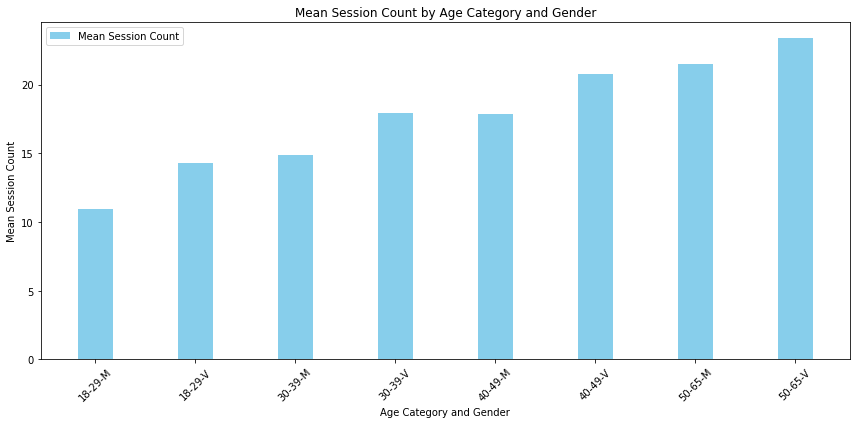

In [23]:
# THE MEAN COUNT OF SESSIONS FOR EACH AGE CATEGORY AND GENDER (PLOT)

groups_age_gender = mean_session_count_by_age_gender.groupby(['AgeCategory', 'Gender'])

plt.figure(figsize=(12, 6))
x = np.arange(len(groups_age_gender))
width = 0.35

plt.bar(x, groups_age_gender['SessionCount'].mean(), width, label='Mean Session Count', color='skyblue')

xtick_labels = [f'{age}-{gender}' for (age, gender) in groups_age_gender.groups.keys()]
plt.xticks(x, xtick_labels, rotation=45)

plt.xlabel('Age Category and Gender')
plt.ylabel('Mean Session Count')
plt.title('Mean Session Count by Age Category and Gender')

plt.legend()

plt.tight_layout()
plt.show()

In [24]:
# GET THE MEAN COUNT OF SESSION FOR EACH AGE CATEGORY

mean_session_count_by_gender = session_counts.groupby('Gender')['SessionCount'].mean().reset_index()
mean_session_count_by_gender

,Gender,SessionCount
0,M,16.201616
1,V,18.645321


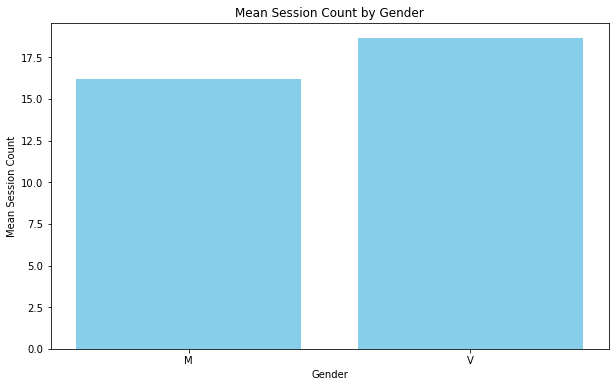

In [25]:
# THE MEAN COUNT OF SESSIONS FOR EACH GENDER(PLOT)

gender_categories_plt = mean_session_count_by_gender['Gender']
session_counts_gender_plt = mean_session_count_by_gender['SessionCount']

plt.figure(figsize=(10, 6))
plt.bar(gender_categories_plt, session_counts_gender_plt, color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Mean Session Count')
plt.title('Mean Session Count by Gender')

plt.xticks(rotation=0)

plt.show()

In [26]:
# GET THE MEAN TIME OF SESSION FOR EACH CUSTOMER

click_log_filtered['TIMESTAMP'] = pd.to_datetime(click_log_filtered['TIMESTAMP'])

click_log_filtered_sort = click_log_filtered.sort_values(by=['CustomerID', 'TIMESTAMP'])

click_log_filtered_sort.reset_index(drop=True, inplace=True)

click_log_filtered_sort['SessionDuration'] = click_log_filtered_sort.groupby('CustomerID')['TIMESTAMP'].diff().fillna(pd.Timedelta(seconds=0))

mean_session_duration = click_log_filtered_sort.groupby(['CustomerID', 'AgeCategory', 'Gender'])['SessionDuration'].mean().reset_index()
mean_session_duration

C:\Users\90545\AppData\Local\Temp\ipykernel_3884\2317061313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_log_filtered['TIMESTAMP'] = pd.to_datetime(click_log_filtered['TIMESTAMP'])


,CustomerID,AgeCategory,Gender,SessionDuration
0,220,40-49,V,0 days 16:10:02.093448275
1,318,50-65,M,3 days 10:04:23.531740
2,495,50-65,M,1 days 12:11:17.502911392
3,511,30-39,V,1 days 22:58:16.339010989
4,609,40-49,V,1 days 06:24:08.548021276
...,...,...,...,...
24087,2240366,50-65,V,0 days 05:56:23.139041095
24088,2240369,18-29,M,7 days 07:20:43.128500
24089,2240374,18-29,M,0 days 00:01:29.299142857
24090,2240435,18-29,M,0 days 13:47:35.615242857


In [27]:
# GET THE MEAN TIME OF SESSIONS FOR EACH AGE CATEGORY AND GENDER

mean_session_time_by_age_gender = mean_session_duration.groupby(['AgeCategory', 'Gender'])['SessionDuration'].mean().reset_index()

mean_session_time_by_age_gender.sort_values('SessionDuration')
mean_session_time_by_age_gender

,AgeCategory,Gender,SessionDuration
0,18-29,M,2 days 04:22:01.105058169
1,18-29,V,1 days 21:38:39.885584852
2,30-39,M,2 days 00:24:15.910150532
3,30-39,V,1 days 18:52:20.666230518
4,40-49,M,2 days 00:08:11.915453304
5,40-49,V,1 days 16:09:02.316752080
6,50-65,M,1 days 19:52:55.839256934
7,50-65,V,1 days 14:19:22.918300868


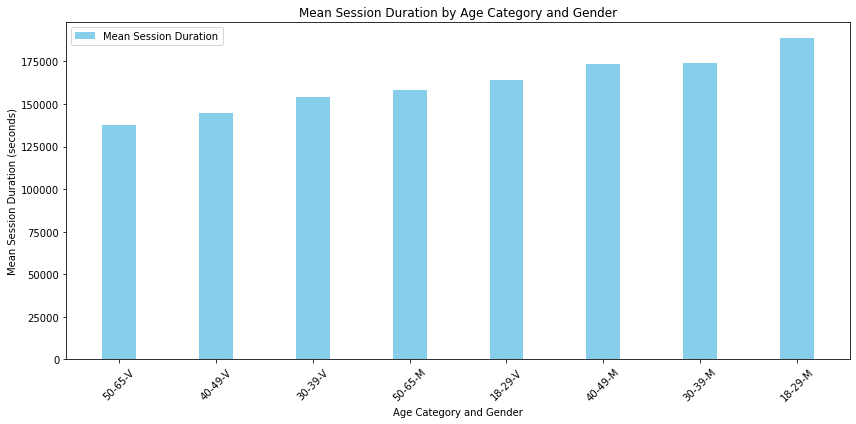

In [28]:
# THE MEAN DURATION OF SESSIONS FOR EACH AGE CATEGORY AND GENDER (PLOT)

mean_session_time_by_age_gender['SessionDuration'] = pd.to_timedelta(mean_session_time_by_age_gender['SessionDuration'])

mean_duration_by_group = mean_session_time_by_age_gender.groupby(['AgeCategory', 'Gender'])['SessionDuration'].mean().reset_index()

mean_duration_by_group['SessionDuration'] = mean_duration_by_group['SessionDuration'].dt.total_seconds()

mean_duration_by_group.sort_values(by='SessionDuration', inplace=True)

plt.figure(figsize=(12, 6))

x = np.arange(len(mean_duration_by_group))
mean_durations = mean_duration_by_group['SessionDuration']

plt.bar(x, mean_durations, width=0.35, label='Mean Session Duration', color='skyblue')

xtick_labels = [f'{age}-{gender}' for age, gender in zip(mean_duration_by_group['AgeCategory'], mean_duration_by_group['Gender'])]
plt.xticks(x, xtick_labels, rotation=45)

plt.xlabel('Age Category and Gender')
plt.ylabel('Mean Session Duration (seconds)')
plt.title('Mean Session Duration by Age Category and Gender')

plt.legend()

plt.tight_layout()
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\90545\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

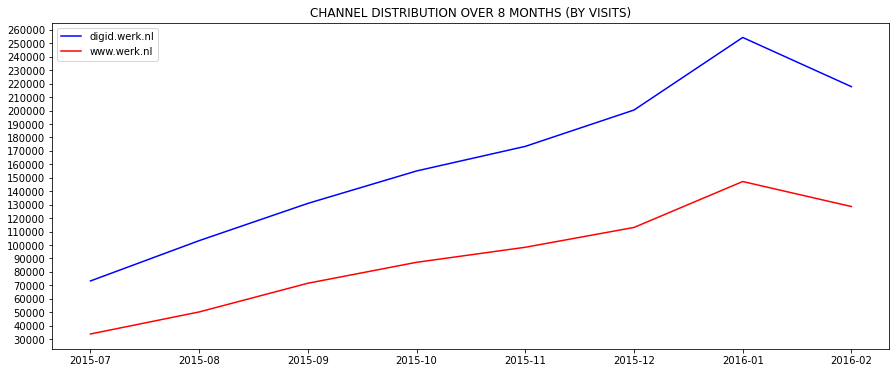

In [29]:
# CHANNEL DISTRIBUTION OVER 8 MONTHS (BY VISITS)

digid_werk_nl_visits = click_log_filtered[click_log_filtered["VHOST"] == "digid.werk.nl"][["VHOST", "TIMESTAMP"]]

digid_werk_nl_visits['YearMonth'] = digid_werk_nl_visits['TIMESTAMP'].dt.strftime('%Y-%m')

digid_werk_nl_monthly_counts_visits = digid_werk_nl_visits.groupby('YearMonth').size().reset_index(name='Count')

www_werk_nl_visits = click_log_filtered[click_log_filtered["VHOST"] == "www.werk.nl"][["VHOST", "TIMESTAMP"]]

www_werk_nl_visits['YearMonth'] = www_werk_nl_visits["TIMESTAMP"].dt.strftime('%Y-%m')

www_werk_nl_monthly_counts_visits = www_werk_nl_visits.groupby('YearMonth').size().reset_index(name='Count')

digid_werk_nl_monthly_counts_visits = digid_werk_nl_monthly_counts_visits.sort_values('YearMonth')
www_werk_nl_monthly_counts_visits = www_werk_nl_monthly_counts_visits.sort_values('YearMonth')

plt.figure(figsize=(15, 6))

plt.plot(digid_werk_nl_monthly_counts_visits['YearMonth'], digid_werk_nl_monthly_counts_visits['Count'], linestyle='-', color='b', label='digid.werk.nl')

plt.plot(www_werk_nl_monthly_counts_visits['YearMonth'], www_werk_nl_monthly_counts_visits['Count'], linestyle='-', color='r', label='www.werk.nl')

plt.legend()

plt.yticks(digid_werk_nl_monthly_counts_visits['Count'], ha='right')

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=10000))

plt.ticklabel_format(axis='y', style='plain', useOffset=False)

plt.title('CHANNEL DISTRIBUTION OVER 8 MONTHS (BY VISITS)')

plt


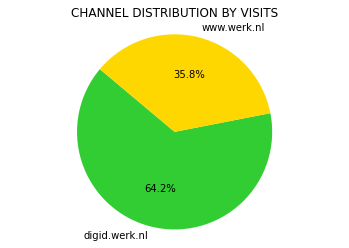

In [30]:
# CHANNEL DISTRIBUTION BY VISITS

value_counts_visits = click_log_filtered["VHOST"].value_counts()

mycolors = ["#32CD32", "#FFD700"]
plt.pie(value_counts_visits, labels=value_counts_visits.index, autopct='%1.1f%%', startangle=140, colors = mycolors)
plt.axis('equal')  
plt.title('CHANNEL DISTRIBUTION BY VISITS')
plt.show()

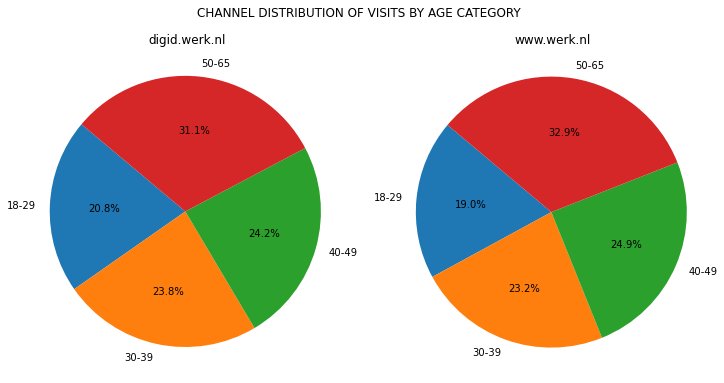

In [31]:
# CHANNEL DISTRIBUTION OF VISITS BY AGE CATEGORY

grouped_AgeCategory_visit = click_log_filtered.groupby(["VHOST", "AgeCategory"])["AgeCategory"].count()

reshaped_AgeCategory_visit = grouped_AgeCategory_visit.unstack(level=1)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(reshaped_AgeCategory_visit.loc["digid.werk.nl"], labels=reshaped_AgeCategory_visit.columns, autopct='%1.1f%%', startangle=140)
axs[0].set_title("digid.werk.nl")

axs[1].pie(reshaped_AgeCategory_visit.loc["www.werk.nl"], labels=reshaped_AgeCategory_visit.columns, autopct='%1.1f%%', startangle=140)
axs[1].set_title("www.werk.nl")

axs[0].axis('equal')
axs[1].axis('equal')

fig.suptitle('CHANNEL DISTRIBUTION OF VISITS BY AGE CATEGORY')

plt.show()

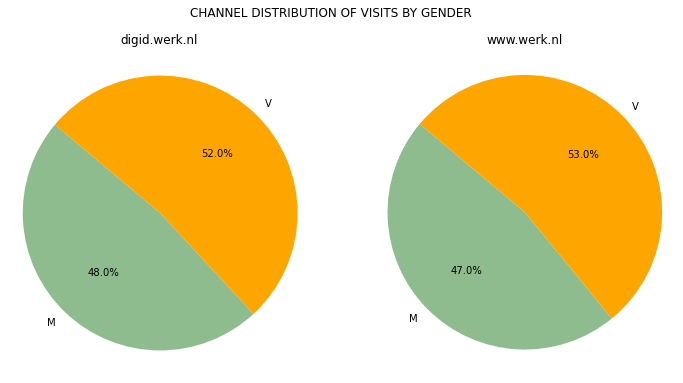

In [32]:
# CHANNEL DISTRIBUTION OF VISITS BY GENDER

grouped_Gender_visits = click_log_filtered.groupby(["VHOST", "Gender"])["Gender"].count()

reshaped_Gender_visits = grouped_Gender_visits.unstack(level=1)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

mycolors_gender = ["#8FBC8F", "#FFA500"]

axs[0].pie(reshaped_Gender_visits.loc["digid.werk.nl"], labels=reshaped_Gender_visits.columns, autopct='%1.1f%%', startangle=140, colors = mycolors_gender)
axs[0].set_title("digid.werk.nl")

axs[1].pie(reshaped_Gender_visits.loc["www.werk.nl"], labels=reshaped_Gender_visits.columns, autopct='%1.1f%%', startangle=140, colors = mycolors_gender)
axs[1].set_title("www.werk.nl")

axs[0].axis('equal')
axs[1].axis('equal')

fig.suptitle('CHANNEL DISTRIBUTION OF VISITS BY GENDER')

plt.show()

In [33]:
# THE LIST OF ALL VALUES OF THE COLUMN page_action_detail_EN

page_action_detail_stat = click_log_filtered["page_action_detail_EN"].value_counts()
page_action_detail_stat

Show tasks                                  1775
Open my Certificate of Registration pdf      775
show closed tasks                            672
Show reports                                 483
show unfinished tasks                        429
show documents                               423
download rtf                                 248
download pDF                                 245
show inbox                                   118
show calendar                                  3
Reporting Add application action 11            3
show week calendar                             3
Add document servlet                           3
Open my Certificate of Registration html       3
workplan read                                  2
Reporting Add application action 8             2
CV Wizard desired function                     1
UC203 respont to vacancy by email              1
sent messages                                  1
Add a message                                  1
Reporting Add applic

In [34]:
# STATISTICS OF THE PERCENTAGE OF ACTION OCCURRENCE < 1%

page_action_detail_stat = page_action_detail_stat.reset_index()
page_action_detail_stat.columns = ['Action', 'Count']

page_action_detail_stat['Percentage'] = ((page_action_detail_stat['Count'] / page_action_detail_stat['Count'].sum()) * 100).round(2)

page_action_detail_stat = page_action_detail_stat.rename(columns={"Action": "Action", "Percentage": "Percentage of Occurrence"})

page_action_detail_stat_percentage = page_action_detail_stat[["Action", "Percentage of Occurrence"]]

page_action_detail_stat_percentage = page_action_detail_stat_percentage[page_action_detail_stat_percentage['Percentage of Occurrence'] < 1]
page_action_detail_stat_percentage = page_action_detail_stat_percentage.sort_values(by ='Percentage of Occurrence', ascending = False)
page_action_detail_stat_percentage = page_action_detail_stat_percentage.reset_index()

page_action_detail_stat_percentage

,index,Action,Percentage of Occurrence
0,9,show calendar,0.06
1,10,Reporting Add application action 11,0.06
2,11,show week calendar,0.06
3,12,Add document servlet,0.06
4,13,Open my Certificate of Registration html,0.06
5,14,workplan read,0.04
6,15,Reporting Add application action 8,0.04
7,16,CV Wizard desired function,0.02
8,17,UC203 respont to vacancy by email,0.02
9,18,sent messages,0.02


In [35]:
# THE PERCENTAGE OF LEAST-USED ACTIONS

percentage_action_least_use = 100 - (page_action_detail_stat_percentage.shape[0] / page_action_detail_stat.shape[0]) * 100

rounded_percentage_action_least_use = math.ceil(percentage_action_least_use)

print(f"The percentage of non-used actions is {rounded_percentage_action_least_use}%.")

The percentage of non-used actions is 43%.


In [36]:
# THE LIST OF ALL VALUES OF THE COLUMN page_action_detail_EN AND VHOST

action_vhost_stat = click_log_filtered.groupby(["VHOST", "page_action_detail_EN"])["CustomerID"].count()
action_vhost_stat

VHOST        page_action_detail_EN                   
www.werk.nl  Add a message                                  1
             Add document servlet                           3
             CV Wizard desired function                     1
             Open my Certificate of Registration html       3
             Open my Certificate of Registration pdf      775
             Reporting Add application Action 10            1
             Reporting Add application action 11            3
             Reporting Add application action 8             2
             Show reports                                 483
             Show tasks                                  1775
             UC203 respont to vacancy by email              1
             download pDF                                 245
             download rtf                                 248
             sent messages                                  1
             show calendar                                  3
             sho

In [37]:
# ACTION USAGE DISTRIBUTION BY AGE CATEGORY

non_empty_rows_actions = click_log_filtered[click_log_filtered["page_action_detail_EN"].notna()]
action_age_full = non_empty_rows_actions.groupby(["AgeCategory"])["CustomerID"].nunique()
action_age_full

AgeCategory
18-29    744
30-39    758
40-49    694
50-65    866
Name: CustomerID, dtype: int64

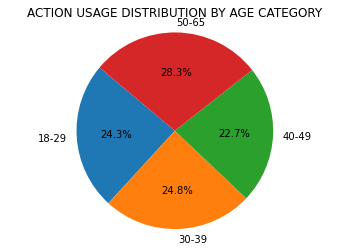

In [38]:
# ACTION USAGE DISTRIBUTION BY AGE CATEGORY (PLOT)

plt.pie(action_age_full, labels=action_age_full.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('ACTION USAGE DISTRIBUTION BY AGE CATEGORY')
plt.show()

In [39]:
# ACTION USAGE DISTRIBUTION BY ACTION AND AGE CATEGORY

action_age_detailed = non_empty_rows_actions.groupby(["page_action_detail_EN", "AgeCategory"])["CustomerID"].nunique()
action_age_detailed

page_action_detail_EN                     AgeCategory
Add a message                             18-29            1
Add document servlet                      18-29            1
                                          40-49            2
CV Wizard desired function                50-65            1
Open my Certificate of Registration html  30-39            1
                                          40-49            1
                                          50-65            1
Open my Certificate of Registration pdf   18-29          109
                                          30-39          126
                                          40-49          158
                                          50-65          227
Reporting Add application Action 10       18-29            1
Reporting Add application action 11       18-29            1
                                          40-49            1
                                          50-65            1
Reporting Add application actio

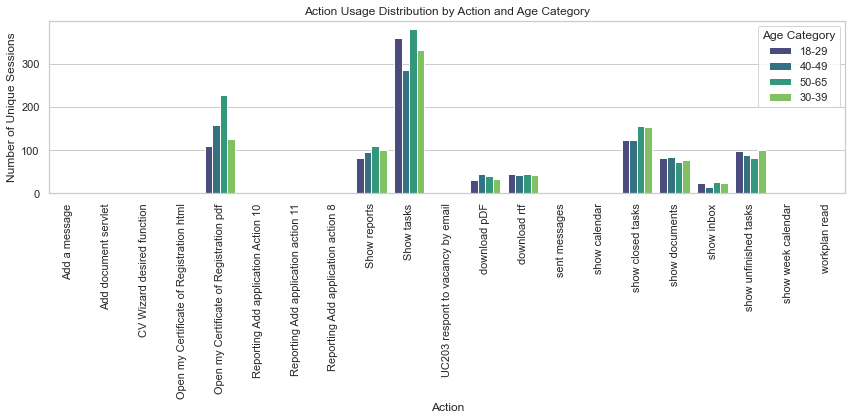

In [40]:
# ACTION USAGE DISTRIBUTION BY ACTION AND AGE CATEGORY (PLOT_DETAILED)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=action_age_detailed.reset_index(), 
    x="page_action_detail_EN",
    y="CustomerID",
    hue="AgeCategory",
    palette="viridis",  
)

plt.title("Action Usage Distribution by Action and Age Category")
plt.xlabel("Action")
plt.ylabel("Number of Unique Sessions")
plt.xticks(rotation=90)  

plt.legend(title="Age Category")
plt.tight_layout()
plt.show()

In [41]:
# ACTION USAGE DISTRIBUTION BY GENDER

action_gender_full = non_empty_rows_actions.groupby(["Gender"])["CustomerID"].nunique()
action_gender_full

Gender
M    1382
V    1680
Name: CustomerID, dtype: int64

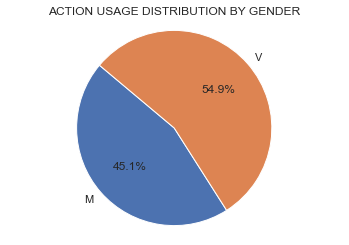

In [42]:
# ACTION USAGE DISTRIBUTION BY GENDER (PLOT)

plt.pie(action_gender_full, labels=action_gender_full.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('ACTION USAGE DISTRIBUTION BY GENDER')
plt.show()

In [43]:
# ACTION USAGE DISTRIBUTION BY ACTION AND GENDER

actions_gender_detailed = non_empty_rows_actions.groupby(["page_action_detail_EN", "Gender"])["CustomerID"].nunique()
actions_gender_detailed

page_action_detail_EN                     Gender
Add a message                             V           1
Add document servlet                      M           2
                                          V           1
CV Wizard desired function                V           1
Open my Certificate of Registration html  M           1
                                          V           2
Open my Certificate of Registration pdf   M         282
                                          V         338
Reporting Add application Action 10       V           1
Reporting Add application action 11       M           2
                                          V           1
Reporting Add application action 8        M           2
Show reports                              M         170
                                          V         217
Show tasks                                M         602
                                          V         755
UC203 respont to vacancy by email         V           1

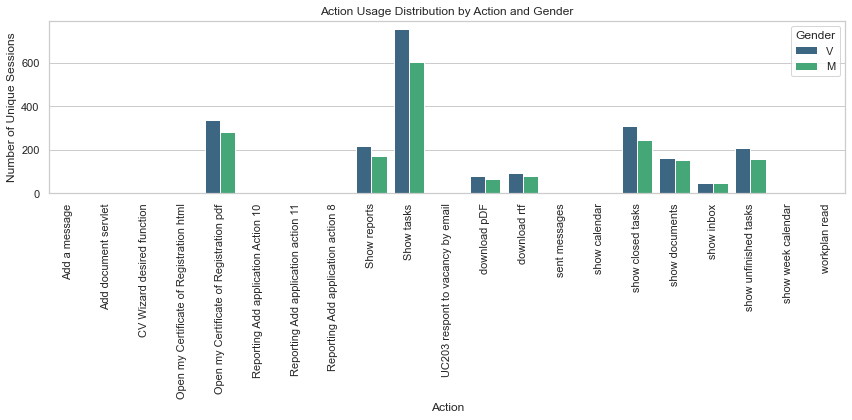

In [44]:
# ACTION USAGE DISTRIBUTION BY ACTION AND GENDER (PLOT_DETAILED)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=actions_gender_detailed.reset_index(), 
    x="page_action_detail_EN",
    y="CustomerID",
    hue="Gender",
    palette="viridis",  
)

plt.title("Action Usage Distribution by Action and Gender")
plt.xlabel("Action")
plt.ylabel("Number of Unique Sessions")
plt.xticks(rotation=90)  

plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [71]:
# THE LIST OF ALL VALUES OF THE COLUMN service_detail_EN

page_service_detail_stat = click_log_filtered["service_detail_EN"].value_counts()
page_service_detail_stat

8. Send data                    7864
7. Supplement                   7141
4. Hours worked                 7029
2. Your last employer           7001
1. Your personal details        6633
6. Your employment history      6607
5. Other work/income            6535
3. The dismissal                6134
1. Your situation                953
7. Send data                     347
3. Your possessions              324
2. Your income                   303
6. Other information             274
4. Your personal information     260
5. The labor market              255
3. Send data                      88
2. Supplement                     85
Name: service_detail_EN, dtype: int64

In [48]:
# THE LIST OF ALL VALUES OF THE COLUMN service_detail_EN AND VHOST

service_vhost_stat = click_log_filtered.groupby(["VHOST", "service_detail_EN"])["CustomerID"].count()
service_vhost_stat

VHOST          service_detail_EN           
digid.werk.nl  1. Your personal details        6633
               1. Your situation                953
               2. Supplement                     85
               2. Your income                   303
               2. Your last employer           7001
               3. Send data                      88
               3. The dismissal                6134
               3. Your possessions              324
               4. Hours worked                 7029
               4. Your personal information     260
               5. Other work/income            6535
               5. The labor market              255
               6. Other information             274
               6. Your employment history      6607
               7. Send data                     347
               7. Supplement                   7141
               8. Send data                    7864
Name: CustomerID, dtype: int64

In [72]:
# STATISTICS OF THE PERCENTAGE OF SERVICES OCCURRENCE < 2%

page_service_detail_stat = page_service_detail_stat.reset_index()
page_service_detail_stat.columns = ['Service', 'Count']

page_service_detail_stat['Percentage'] = ((page_service_detail_stat['Count'] / page_service_detail_stat['Count'].sum()) * 100).round(2)

#page_service_detail_stat = page_service_detail_stat.rename(columns={"Service": "Service", "Percentage": "Percentage of Occurrence"})

percentage_service_least_use = page_service_detail_stat[page_service_detail_stat['Percentage'] < 2]

percentage_service_least_use

,Service,Count,Percentage
8,1. Your situation,953,1.65
9,7. Send data,347,0.60
10,3. Your possessions,324,0.56
11,2. Your income,303,0.52
12,6. Other information,274,0.47
13,4. Your personal information,260,0.45
14,5. The labor market,255,0.44
15,3. Send data,88,0.15
16,2. Supplement,85,0.15


In [67]:
# THE PERCENTAGE OF LEAST-USED SERVICES


percentage_service_least_use_stat = 100 - (percentage_service_least_use.shape[0] / page_service_detail_stat.shape[0]) * 100

rounded_percentage_service_least_use = math.ceil(percentage_service_least_use_stat)

print(f"The percentage of non-used services is {rounded_percentage_service_least_use}%.")

The percentage of non-used services is 48%.


In [46]:
# SERVICE USAGE DISTRIBUTION BY AGE CATEGORY

non_empty_rows_service = click_log_filtered[click_log_filtered["service_detail_EN"].notna()]

service_age_full = non_empty_rows_service.groupby(["AgeCategory"])["CustomerID"].nunique()
service_age_full

AgeCategory
18-29    2008
30-39    1828
40-49    1505
50-65    1690
Name: CustomerID, dtype: int64

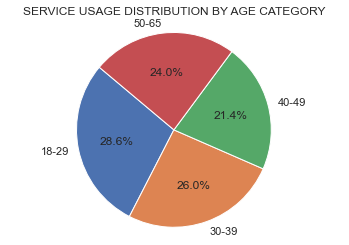

In [47]:
# SERVICE USAGE DISTRIBUTION BY AGE CATEGORY (PLOT)

plt.pie(service_age_full, labels=service_age_full.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('SERVICE USAGE DISTRIBUTION BY AGE CATEGORY')
plt.show()

In [49]:
# SERVICE USAGE DISTRIBUTION BY GENDER

service_gender_full = non_empty_rows_service.groupby(["Gender"])["CustomerID"].nunique()
service_gender_full

Gender
M    3736
V    3295
Name: CustomerID, dtype: int64

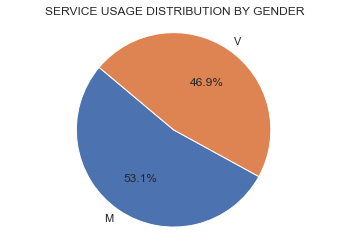

In [50]:
# SERVICE USAGE DISTRIBUTION BY GENDER (PLOT)

plt.pie(service_gender_full, labels=service_gender_full.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('SERVICE USAGE DISTRIBUTION BY GENDER')
plt.show()

In [51]:
# SERVICE USAGE DISTRIBUTION BY AGE CATEGORY

age_service_detailed = non_empty_rows_service.groupby(["service_detail_EN", "AgeCategory"])["CustomerID"].nunique()
age_service_detailed.sort_values()
age_service_detailed

service_detail_EN         AgeCategory
1. Your personal details  18-29          1224
                          30-39          1186
                          40-49          1051
                          50-65          1181
1. Your situation         18-29           263
                                         ... 
7. Supplement             50-65          1299
8. Send data              18-29          1523
                          30-39          1490
                          40-49          1252
                          50-65          1385
Name: CustomerID, Length: 68, dtype: int64

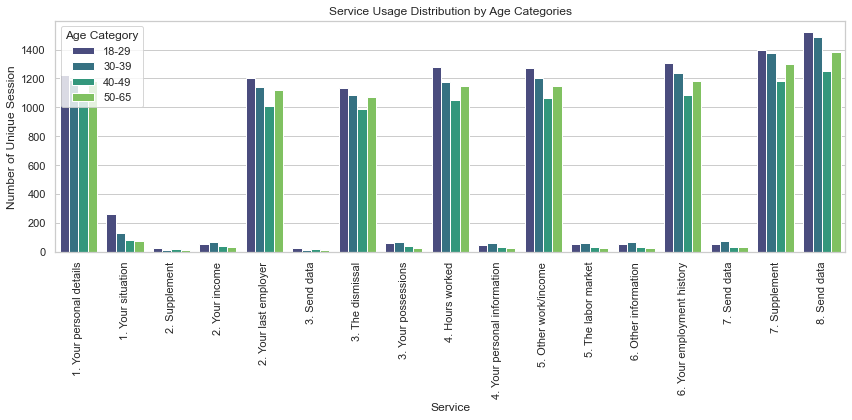

In [53]:
# SERVICE USAGE DISTRIBUTION BY AND AGE CATEGORIES (PLOT_DETAILED)

sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=age_service_detailed.reset_index(),  
    x="service_detail_EN",
    y="CustomerID",
    hue="AgeCategory",
    palette="viridis",  
)

plt.title("Service Usage Distribution by Age Categories")
plt.xlabel("Service")
plt.ylabel("Number of Unique Session")
plt.xticks(rotation=90)  

# Show the plot
plt.legend(title="Age Category")
plt.tight_layout()
plt.show()


In [54]:
# SERVICE USAGE DISTRIBUTION BY GENDER

service_gender_detailed = non_empty_rows_service.groupby(["service_detail_EN", "Gender"])["CustomerID"].nunique()
service_gender_detailed

service_detail_EN             Gender
1. Your personal details      M         2511
                              V         2131
1. Your situation             M          281
                              V          267
2. Supplement                 M           38
                              V           28
2. Your income                M           96
                              V          106
2. Your last employer         M         2423
                              V         2054
3. Send data                  M           38
                              V           31
3. The dismissal              M         2312
                              V         1957
3. Your possessions           M           90
                              V          103
4. Hours worked               M         2521
                              V         2138
4. Your personal information  M           87
                              V           87
5. Other work/income          M         2506
                  

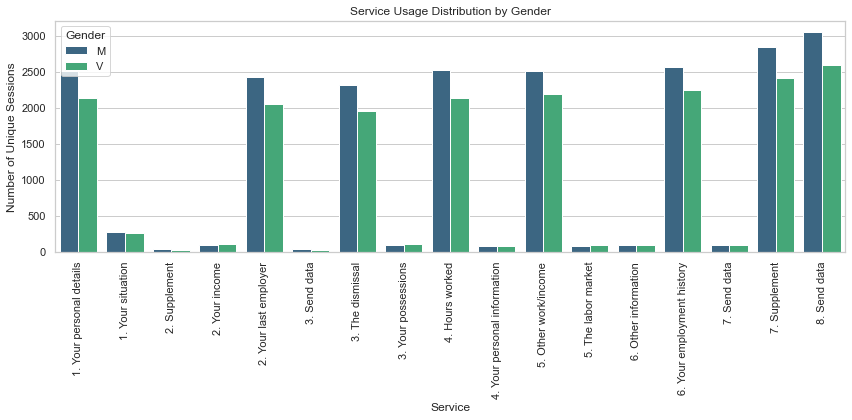

In [55]:
# SERVICE USAGE DISTRIBUTION BY GENDER (PLOT_DETAILED)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=service_gender_detailed.reset_index(),  
    x="service_detail_EN",
    y="CustomerID",
    hue="Gender",
    palette="viridis",  
)

plt.title("Service Usage Distribution by Gender")
plt.xlabel("Service")
plt.ylabel("Number of Unique Sessions")
plt.xticks(rotation=90) 

plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [73]:
# CONVERT TO THE EVENT LOG WITH SESSION CASES

event_log_SessionID = click_log_filtered.copy()

event_log_SessionID.rename(columns={'TIMESTAMP': 'time:timestamp', 'SessionID': 'case:concept:name', 
                          'Activity': 'concept:name'}, inplace=True)

event_log_SessionID = event_log_SessionID.sort_values(by=['case:concept:name', 'time:timestamp'])

event_log_SessionID = pm4py.format_dataframe(event_log_SessionID, case_id='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')

event_log_SessionID

C:\Users\90545\AppData\Local\Temp\ipykernel_3884\2323810567.py:10: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  event_log_SessionID = pm4py.format_dataframe(event_log_SessionID, case_id='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')


,CustomerID,AgeCategory,Gender,Office_U,Office_W,case:concept:name,IPID,time:timestamp,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info,concept:name,@@index,@@case_index
0,2019561,50-65,V,257,257,10000323,1411045,2015-07-21 20:19:34.013,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"('digid.werk.nl', 'taken', nan, nan, nan)",0,0
1,808550,50-65,M,327,321,10000597,1660123,2015-08-18 11:53:29.253,www.werk.nl,/werk_nl/werknemer/home,home,NaN,0,NaN,NaN,NaN,NaN,"('www.werk.nl', 'home', nan, nan, nan)",1,1
2,808550,50-65,M,327,321,10000597,1660123,2015-08-18 11:54:07.543,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"('digid.werk.nl', 'taken', nan, nan, nan)",2,1
3,1333121,30-39,V,271,278,10000674,1424064,2015-07-25 16:01:09.233,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"('digid.werk.nl', 'mijn_berichten', nan, nan, ...",3,2
4,1333121,30-39,V,271,278,10000674,1424064,2015-07-25 16:02:40.123,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mi...,mijn_cv,NaN,0,NaN,NaN,NaN,NaN,"('digid.werk.nl', 'mijn_cv', nan, nan, nan)",4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038412,2044721,50-65,M,257,261,9999937,1026691,2015-11-01 10:57:35.153,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"('digid.werk.nl', 'mijn_documenten', nan, nan,...",2038412,418663
2038413,2044721,50-65,M,257,261,9999937,1026691,2015-11-01 10:57:51.677,www.werk.nl,/werk_nl/werknemer/home,home,Logged Out,0,NaN,NaN,NaN,NaN,"('www.werk.nl', 'home', 'Logged Out', nan, nan)",2038413,418663
2038414,1457194,50-65,M,296,291,9999965,1002739,2015-09-21 19:27:03.647,www.werk.nl,/werk_nl/werknemer/home,home,NaN,0,NaN,NaN,NaN,NaN,"('www.werk.nl', 'home', nan, nan, nan)",2038414,418664
2038415,1457194,50-65,M,296,291,9999965,1002739,2015-09-21 19:27:38.417,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"('digid.werk.nl', 'taken', nan, nan, nan)",2038415,418664


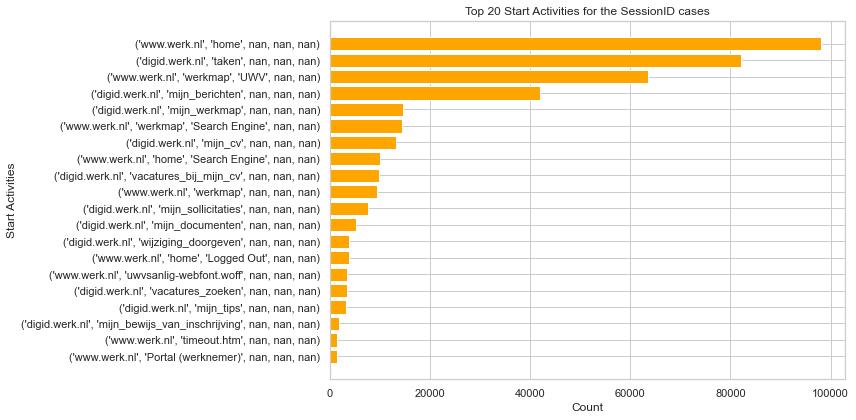

In [74]:
# THE DISTRIBUTION OF 20-TOP START ACTIVITIES OF THE EVENT LOG WITH SESSIONID CASES

event_log_start_activities_SessionID = pm4py.stats.get_start_activities(event_log_SessionID)

top_20_start_activities_SessionID = dict(sorted(event_log_start_activities_SessionID.items(), key=lambda x: x[1], reverse=True)[:20])

activity_names = list(top_20_start_activities_SessionID.keys())
activity_counts = list(top_20_start_activities_SessionID.values())

plt.figure(figsize=(12, 6))
plt.barh(activity_names, activity_counts, color='orange')
plt.xlabel('Count')
plt.ylabel('Start Activities')
plt.title('Top 20 Start Activities for the SessionID cases')
plt.gca().invert_yaxis() 
plt.tight_layout()

plt.show()

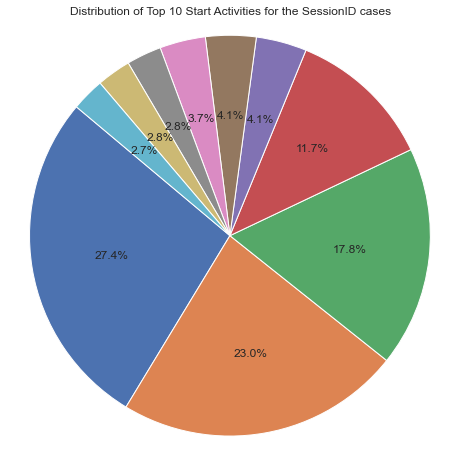

In [75]:
# THE DISTRIBUTION OF TOP-10 START ACTIVITIES OF THE EVENT LOG WITH SESSIONID CASES (PERCENTAGE)

top_10_start_activities_SessionID = dict(sorted(event_log_start_activities_SessionID.items(), key=lambda x: x[1], reverse=True)[:10])

activity_counts_10 = list(top_10_start_activities_SessionID.values())

plt.figure(figsize=(8, 8))
plt.pie(activity_counts_10, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 

plt.title('Distribution of Top 10 Start Activities for the SessionID cases')

plt.show()

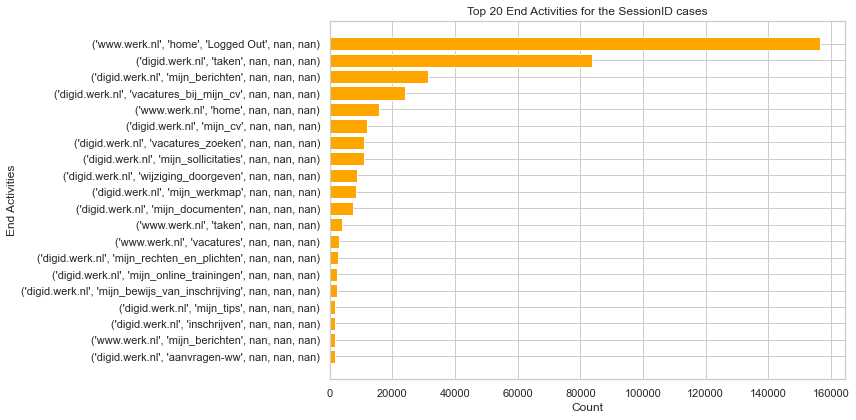

In [76]:
# THE DISTRIBUTION OF 20-TOP END ACTIVITIES OF THE EVENT LOG WITH SESSIONID CASES

event_log_end_activities_SessionID = pm4py.stats.get_end_activities(event_log_SessionID)

top_20_end_activities_SessionID = dict(sorted(event_log_end_activities_SessionID.items(), key=lambda x: x[1], reverse=True)[:20])

activity_names_end_20 = list(top_20_end_activities_SessionID.keys())
activity_counts_end_20 = list(top_20_end_activities_SessionID.values())

plt.figure(figsize=(12, 6))
plt.barh(activity_names_end_20, activity_counts_end_20, color='orange')
plt.xlabel('Count')
plt.ylabel('End Activities')
plt.title('Top 20 End Activities for the SessionID cases')
plt.gca().invert_yaxis()  
plt.tight_layout()

plt.show()

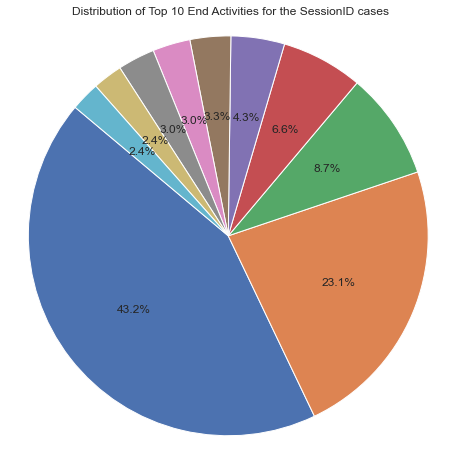

In [77]:
# THE DISTRIBUTION OF TOP-10 END ACTIVITIES OF THE EVENT LOG WITH SESSIONID CASES (PERCENTAGE)

top_10_end_activities_SessionID = dict(sorted(event_log_end_activities_SessionID.items(), key=lambda x: x[1], reverse=True)[:10])

activity_counts_end_10 = list(top_10_end_activities_SessionID.values())

plt.figure(figsize=(8, 8))
plt.pie(activity_counts_end_10, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  

plt.title('Distribution of Top 10 End Activities for the SessionID cases')

plt.show()

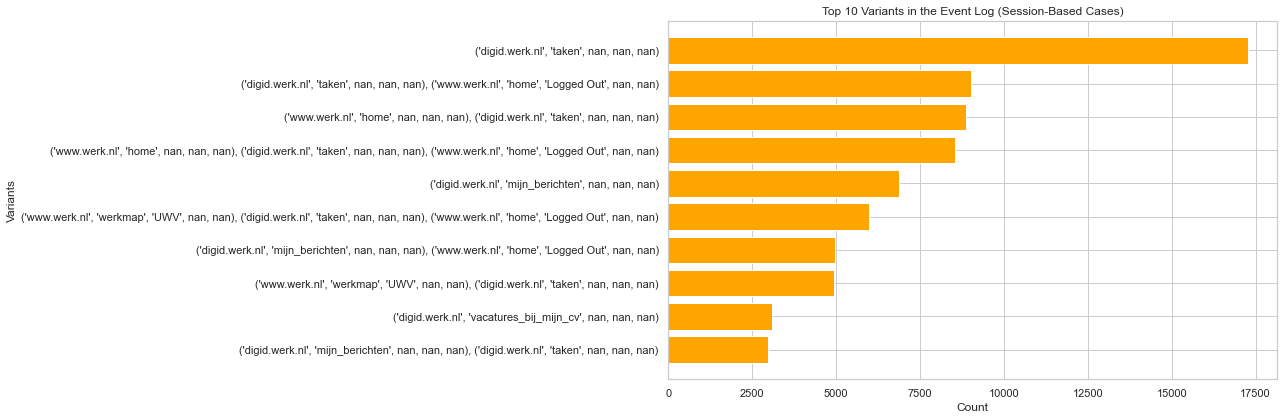

In [78]:
# TOP 10 VARIANT DISTRIBUTION (PLOT) FOR EVENT LOG WITH SESSIONID CASES

event_log_variants_SessionID = pm4py.stats.get_variants(event_log_SessionID)

variant_counts_SessionID = Counter(event_log_variants_SessionID)

sorted_variants_SessionID = sorted(variant_counts_SessionID.items(), key=lambda x: x[1], reverse=True)

top_variants_SessionID = sorted_variants_SessionID[:10]

variants_SessionID = [', '.join(variant[0]) for variant in top_variants_SessionID]
counts_SessionID = [variant[1] for variant in top_variants_SessionID]

plt.figure(figsize=(18, 6))
plt.barh(variants_SessionID, counts_SessionID, color='orange')
plt.xlabel('Count')
plt.ylabel('Variants')
plt.title('Top 10 Variants in the Event Log (Session-Based Cases)')
plt.gca().invert_yaxis()  
plt.tight_layout()

plt.show()

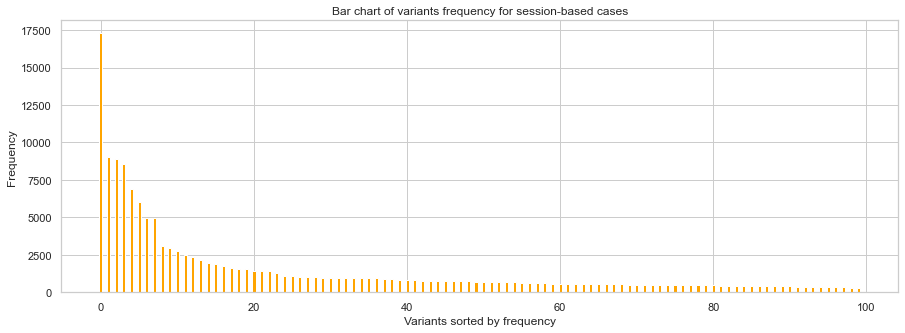

In [79]:
# DISTRIBUTION OF THE VARIANTS OF THE EVENT LOG WITH SESSIONID CASES

variants_df_SessionID = pd.DataFrame.from_records(sorted_variants_SessionID).rename(columns={0: 'Variants', 1: 'Count'})
variants_df_SessionID

variant_plot_adj_SessionID = variants_df_SessionID[0:100].index
frequency_plot_adj_SessionID = variants_df_SessionID[0:100]['Count']

frequency_log_SessionID = [math.log(i, 2) for i in frequency_plot_adj_SessionID] 

fig = plt.figure(figsize = (15, 5))
 
plt.bar(variant_plot_adj_SessionID, frequency_plot_adj_SessionID, color ='orange',
        width = 0.4)
 
plt.xlabel("Variants sorted by frequency")
plt.ylabel("Frequency")
plt.title("Bar chart of variants frequency for session-based cases")
plt.show()